# Experiments

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from plant_pathology.utils import *
from plant_pathology.dataset import *
from plant_pathology.evaluate import *
from fastai.vision.all import *
from fastai.callback.wandb import *
import wandb

In [ ]:
wandb.init(project="plant-pathology")

wandb: Currently logged in as: bwolfson97 (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.10.8 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


## Prep Data

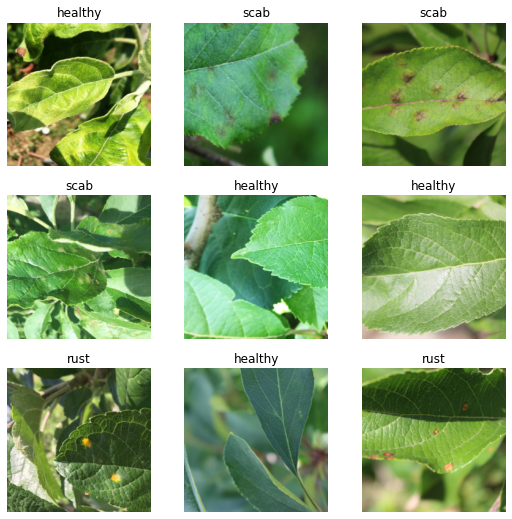

In [ ]:
path, df = load_data()
dls = get_dls(path, df, 800, 256, bs=256, val_fold=0)
dls.show_batch()

## Create Model

In [ ]:
learn = cnn_learner(dls, resnet18, loss_func=LabelSmoothingCrossEntropyFlat(), metrics=[accuracy, RocAuc()], cbs=WandbCallback(log_model=False))

SuggestedLRs(lr_min=0.03019951581954956, lr_steep=0.0012022644514217973)

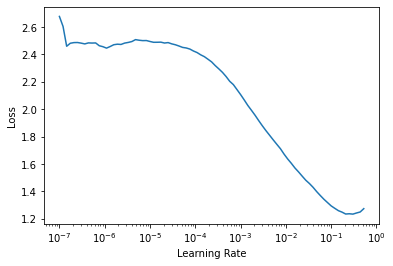

In [ ]:
learn.lr_find()

## Train

In [ ]:
learn.fit_one_cycle(2, 2e-2)

WandbCallback could not log config parameters -> Object of type function is not JSON serializable


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.787423,5.030562,0.627397,0.881746,00:51
1,1.412493,1.770863,0.693151,0.913477,00:43


In [ ]:
learn.unfreeze()

SuggestedLRs(lr_min=0.002754228748381138, lr_steep=0.0010000000474974513)

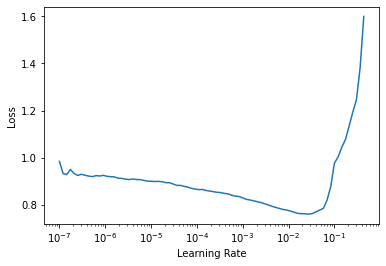

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(20, slice(1e-5, 1e-3))

## Analyze

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

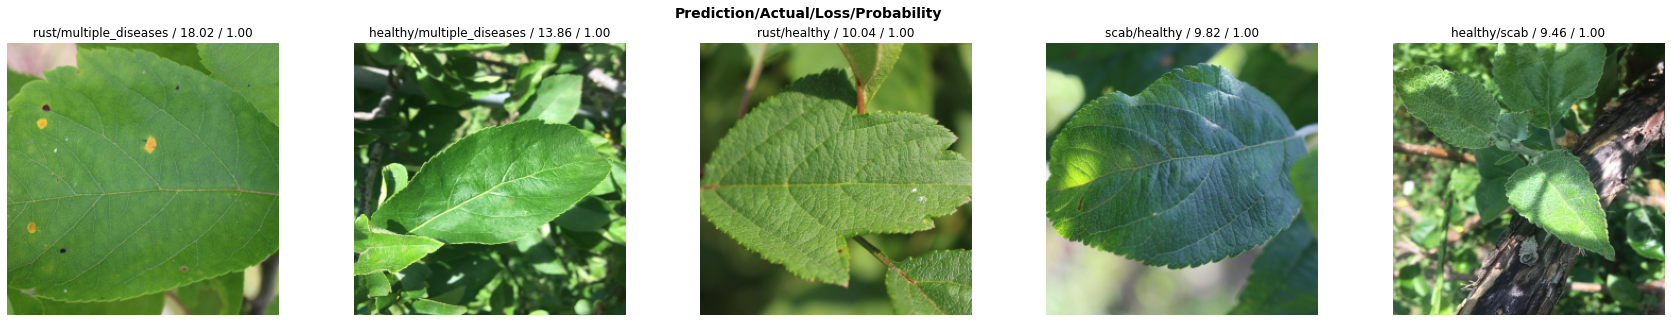

In [ ]:
interp.plot_top_losses(5, figsize=(30, 5), nrows=1)

## Infer and Submit

In [ ]:
preds = infer_on_test_set(learn)

In [ ]:
submission_path = format_submission(preds)

In [ ]:
submission_path

Path('/home/jupyter/kaggle/plant-pathology/data/plant-pathology-2020/submission.csv')

In [ ]:
kaggle_submit_command()

!kaggle competitions submit -c plant-pathology-2020-fgvc7 -f {save_path} -m 'hi'


In [ ]:
!kaggle competitions submit -c plant-pathology-2020-fgvc7 -f {submission_path} -m 'w&b run, nothing special'

100%|████████████████████████████████████████| 103k/103k [00:03<00:00, 35.0kB/s]
Successfully submitted to Plant Pathology 2020 - FGVC7